In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Ziad_Kaggle_API"

In [4]:
! kaggle datasets download psycon/wind-turbine-energy-kw-generation-data
! unzip wind-turbine-energy-kw-generation-data.zip

wind-turbine-energy-kw-generation-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  wind-turbine-energy-kw-generation-data.zip
replace feature_units.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: feature_units.csv       
  inflating: features.csv            
  inflating: power.csv               
  inflating: sample_submission.csv   


 We have 3 dataset files about this data 


1.   Power dataset [ power output quantity ]
2.   Units of thw features
3.   features



In [5]:
df=pd.read_csv('power.csv')
df.head()

,Timestamp,Power(kW)
0,2019-01-01 00:00:00,705.876648
1,2019-01-01 00:10:00,884.711670
2,2019-01-01 00:20:00,982.875000
3,2019-01-01 00:30:00,1115.943359
4,2019-01-01 00:40:00,1263.841675


In [6]:
df.tail()

,Timestamp,Power(kW)
136725,2021-08-14 23:10:00,2757.728271
136726,2021-08-14 23:20:00,2758.323242
136727,2021-08-14 23:30:00,2759.243408
136728,2021-08-14 23:40:00,2761.261719
136729,2021-08-14 23:50:00,2758.593262


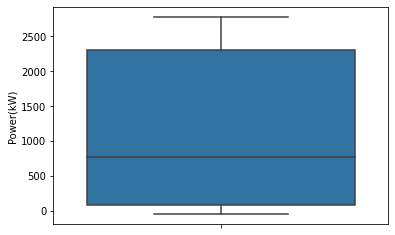

In [7]:
sns.boxplot(y='Power(kW)',data=df);

In the general form, the numbers appear in a moderate state in relation to the goal, and it does not require us to work on the goal to improve it in one way or another.

In [8]:
df['Timestamp'][0], df['Timestamp'][136729]

('2019-01-01 00:00:00', '2021-08-14 23:50:00')

In [9]:
df['Timestamp'][0], df['Timestamp'][1], df['Timestamp'][2]

('2019-01-01 00:00:00', '2019-01-01 00:10:00', '2019-01-01 00:20:00')

Samples were taken on a daily basis every 10 minutes for a period from the beginning of 2019 to the month of 8 of 2021, so our database is strong and large and dealing with it is a bit difficult

In [10]:
features_df = pd.read_csv('features.csv')
features_df.head()

,Timestamp,Gearbox_T1_High_Speed_Shaft_Temperature,Gearbox_T3_High_Speed_Shaft_Temperature,Gearbox_T1_Intermediate_Speed_Shaft_Temperature,Temperature Gearbox Bearing Hollow Shaft,Tower Acceleration Normal,Gearbox_Oil-2_Temperature,Tower Acceleration Lateral,Temperature Bearing_A,Temperature Trafo-3,...,Blade-1 Actual Value_Angle-A,Blade-2 Set Value_Degree,Pitch Demand Baseline_Degree,Blade-1 Set Value_Degree,Blade-3 Set Value_Degree,Moment Q Direction,Moment Q Filltered,Proxy Sensor_Degree-45,Turbine State,Proxy Sensor_Degree-315
0,2019-01-01 00:00:00,57.000000,59.000000,52.000000,56.158333,47.053776,57.000000,18.890772,35.000000,48.576668,...,0.055473,0.267122,0.0,0.058617,-0.325738,37.867054,39.281124,5.732657,1.0,5.779913
1,2019-01-01 00:10:00,57.693333,59.485001,52.450001,57.000000,64.969742,57.413334,28.560265,35.233334,48.000000,...,0.055473,0.267122,0.0,0.058617,-0.325738,-90.169106,-89.018669,5.813177,1.0,5.796757
2,2019-01-01 00:20:00,59.000000,60.756668,53.536667,57.775002,51.149670,58.728333,34.228813,36.000000,48.053333,...,0.055473,0.267122,0.0,0.058617,-0.325738,-88.556343,-88.422020,5.786413,1.0,5.772958
3,2019-01-01 00:30:00,59.881668,61.563332,54.413334,58.683334,58.740929,59.518333,35.593220,36.000000,48.788334,...,0.055473,0.267122,0.0,0.058617,-0.325738,-123.755341,-124.858444,5.758913,1.0,5.728393
4,2019-01-01 00:40:00,61.290001,62.586666,55.485001,59.623333,53.264774,60.665001,38.552731,36.000000,49.000000,...,0.053982,0.267612,0.0,0.058703,-0.325443,-142.533325,-142.053543,5.724591,1.0,5.687730


In [11]:
features_df['Timestamp'] =  pd.to_datetime(features_df['Timestamp'])

In [12]:
features_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154262 entries, 0 to 154261
Data columns (total 77 columns):
 #   Column                                             Non-Null Count   Dtype         
---  ------                                             --------------   -----         
 0   Timestamp                                          154262 non-null  datetime64[ns]
 1   Gearbox_T1_High_Speed_Shaft_Temperature            149913 non-null  float64       
 2   Gearbox_T3_High_Speed_Shaft_Temperature            149744 non-null  float64       
 3   Gearbox_T1_Intermediate_Speed_Shaft_Temperature    150253 non-null  float64       
 4   Temperature Gearbox Bearing Hollow Shaft           150530 non-null  float64       
 5   Tower Acceleration Normal                          149904 non-null  float64       
 6   Gearbox_Oil-2_Temperature                          149326 non-null  float64       
 7   Tower Acceleration Lateral                         150070 non-null  float64       
 8   Temp

Many of the existing features are inherently related to the output of electrical generation, so they do not affect the work of the turbine in some way or do not enter into the state of production based on the turbine.
like : Moment Q Direction ,Line Frequency, Reactive Power ,Voltage B-N

There are also some missing values, not many, but we can deal with them through the mean

In [13]:
# NULLS 
for i in range(1,len(features_df.columns)) : 
      features_df[features_df.columns[i]].fillna(features_df[features_df.columns[i]].mean(),inplace = True )
features_df.isna().sum()  

Timestamp                                          0
Gearbox_T1_High_Speed_Shaft_Temperature            0
Gearbox_T3_High_Speed_Shaft_Temperature            0
Gearbox_T1_Intermediate_Speed_Shaft_Temperature    0
Temperature Gearbox Bearing Hollow Shaft           0
                                                  ..
Moment Q Direction                                 0
Moment Q Filltered                                 0
Proxy Sensor_Degree-45                             0
Turbine State                                      0
Proxy Sensor_Degree-315                            0
Length: 77, dtype: int64

In [14]:
features_df['Power(kW)'] = df['Power(kW)'] # ADD POWER 

In [15]:
features_df.columns

Index(['Timestamp', 'Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature', 'Torque',
       'Converter Control Unit Reactive Power', 'Temperature Trafo-2',
       'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'Voltage C-N', 'Temperature Axis Box-2',
       'Temperature Axis Box-1', 'Voltage B-N', 'Nacelle Position_Degree',
       

In [16]:
col = [ 'Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature', 'Torque',
       'Converter Control Unit Reactive Power', 'Temperature Trafo-2',
       'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'Voltage C-N', 'Temperature Axis Box-2',
       'Temperature Axis Box-1', 'Voltage B-N', 'Nacelle Position_Degree',
       'Converter Control Unit Voltage', 'Temperature Battery Box-3',
       'Temperature Battery Box-2', 'Temperature Battery Box-1',
       'Hydraulic Prepressure', 'Angle Rotor Position',
       'Temperature Tower Base', 'Pitch Offset-2 Asymmetric Load Controller',
       'Pitch Offset Tower Feedback', 'Line Frequency', 'Internal Power Limit',
       'Circuit Breaker cut-ins', 'Particle Counter',
       'Tower Accelaration Normal Raw', 'Torque Offset Tower Feedback',
       'External Power Limit', 'Blade-2 Actual Value_Angle-B',
       'Blade-1 Actual Value_Angle-B', 'Blade-3 Actual Value_Angle-B',
       'Temperature Heat Exchanger Converter Control Unit',
       'Tower Accelaration Lateral Raw', 'Temperature Ambient',
       'Nacelle Revolution', 'Pitch Offset-1 Asymmetric Load Controller',
       'Tower Deflection', 'Pitch Offset-3 Asymmetric Load Controller',
       'Wind Deviation 1 seconds', 'Wind Deviation 10 seconds',
       'Proxy Sensor_Degree-135', 'State and Fault', 'Proxy Sensor_Degree-225',
       'Blade-3 Actual Value_Angle-A', 'Scope CH 4',
       'Blade-2 Actual Value_Angle-A', 'Blade-1 Actual Value_Angle-A',
       'Blade-2 Set Value_Degree', 'Pitch Demand Baseline_Degree',
       'Blade-1 Set Value_Degree', 'Blade-3 Set Value_Degree',
       'Moment Q Direction', 'Moment Q Filltered', 'Proxy Sensor_Degree-45',
       'Turbine State', 'Proxy Sensor_Degree-315']

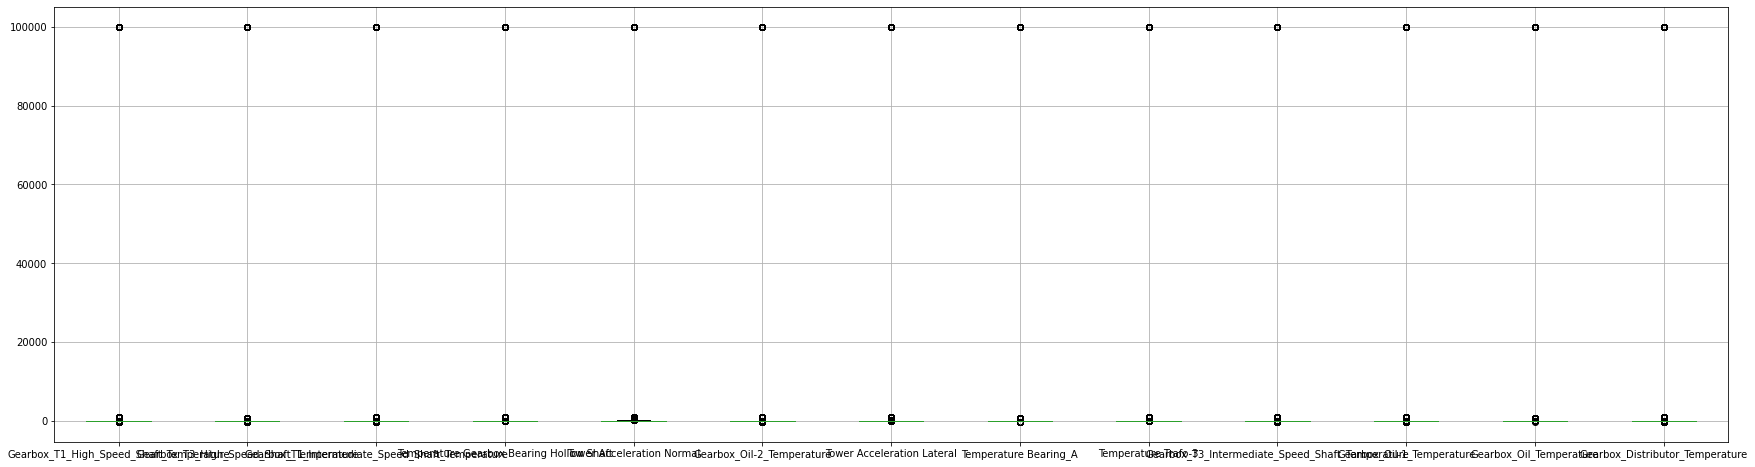

In [17]:
plt.figure(figsize=(30,8))

Gearbox_2019=features_df[[ 'Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature','Gearbox_Distributor_Temperature']]
Gearbox_2019.boxplot() 

Here we dealt with some outliers in the important characteristics affecting the turbine working cycle through the mean compensation

In [18]:
def handling_outliers(orignal_df,lst_of_columns) :
    for i in lst_of_columns:
        q1 = orignal_df[i].quantile(0.25)
        q3 = orignal_df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        for col in range(0,orignal_df.shape[0]):
            if orignal_df[i][col] < lower_bound :
                orignal_df[i][col]  = orignal_df[i].mean()
            elif orignal_df[i][col] > upper_bound :
                orignal_df[i][col]  = orignal_df[i].mean()
            else:
                continue 
    print("handling is done")

In [ ]:
handling_outliers(features_df,col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


# 2019 Analysis :

In 2019 there are 6 * 24 * 365 which is 52123 reading points

It requires us to expect the rest of 2021, which means four months, within 17532 points 

In [ ]:
round = 17532
year = 52123

In [ ]:
# 2019
df_Power_2019=features_df.iloc[0:52123,:]
df_Power_2019['Timestamp'].tail()

In [ ]:
df_Power_2019.reset_index(drop = True,inplace = True)
df_Power_2019.set_index('Timestamp',inplace = True)

In [ ]:
Gearbox_2019.corr()     

All the features related to the Jarbox are very affected by each other and related to each other through what appears to us, so we can deal with the most feature affecting them in the analysis

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019[['Power(kW)']])

Energy productivity is not trendy, but it is seasonal I think, productivity increases in the summer and decreases in the middle of spring and winter

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])

As we can see at the beginning of the year and winter, productivity is a bit low

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][round:round*2])

At the end of spring and summer, the productivity of the turbines increases

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][round*2:round*3])

At the end of the year and the onset of winter, the production rate decreases, and the turbines are not in their best condition

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Power(kW)']][round:round*2])
plt.plot(df_Power_2019[['Power(kW)']][round*2:round*3])

This illustration is very placed between seasons in production

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Gearbox_Distributor_Temperature']])

We moved to what is related to the turbine itself. The gearbox is declining in temperature with the year, but it is in a state of relative stability, and accordingly, on the same line, all the characteristics of the gearbox are affected.

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Gearbox_Distributor_Temperature']][:round])

The increase in the general temperature of the gearbox significantly affects the productivity of the turbines

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']])
plt.plot(df_Power_2019[['Gearbox_Distributor_Temperature']])

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Hydraulic Prepressure']])

Hydraulic pressure also remains relatively constant but declines throughout the year

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Hydraulic Prepressure']][:round])

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']])
plt.plot(df_Power_2019[['Hydraulic Prepressure']])

It seems that the increase in hydraulic pressure also affects the production in some way

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Torque']])

Here is the torque, which is the main display of wind strength, and it seems to be seasonal as well

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Torque']][:round])

Contrary to what is expected, the increase in torque does not mean that it increases the productivity of the turbines, perhaps a wrong wind direction, or that the turbines need a certain degree of rotation to reach the best result.

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']])
plt.plot(df_Power_2019[['Torque']])

We note here that the torque appears to increase continuously throughout the year.. but it does not have the first role in increasing productivity

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Tower Accelaration Lateral Raw']])

Tower Accelaration Lateral Raw Stable throughout the year and does not significantly affect productivity

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_Power_2019[['Power(kW)']][:round])
plt.plot(df_Power_2019[['Tower Accelaration Lateral Raw']][:round])

Note that sometimes that Tower Accelaration Lateral Raw Increasing it increases productivity at exactly the same time

In [ ]:
# 2020
df_Power_2020=features_df.iloc[52123:52123*2 + 188,:]
df_Power_2020['Timestamp'].tail()


In [ ]:
df_Power_2020.reset_index(drop = True,inplace = True)
df_Power_2020.set_index('Timestamp',inplace = True)

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Power(kW)'])
plt.plot(df_Power_2020['Power(kW)'])

It becomes clear to us that there is seasonality in 2020 as well as 2019, and that productivity increases in the half year and summer period at a higher rate than the rest of the year

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Torque'])
plt.plot(df_Power_2020['Torque'])

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Gearbox_Distributor_Temperature'])
plt.plot(df_Power_2020['Gearbox_Distributor_Temperature'])

In [ ]:
df_Power_2021=features_df.iloc[52123*2 + 188:136729,:]
df_Power_2021['Timestamp'].tail()


In [ ]:
df_Power_2021.reset_index(drop = True,inplace = True)
df_Power_2021.set_index('Timestamp',inplace = True)

In [ ]:
plt.figure(figsize=(40,8))
plt.plot(df_Power_2019['Power(kW)'])
plt.plot(df_Power_2020['Power(kW)'])
plt.plot(df_Power_2021['Power(kW)'])

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Torque'])
plt.plot(df_Power_2020['Torque'])
plt.plot(df_Power_2021['Torque'])

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_Power_2019['Gearbox_Distributor_Temperature'])
plt.plot(df_Power_2020['Gearbox_Distributor_Temperature'])
plt.plot(df_Power_2021['Gearbox_Distributor_Temperature'])

# Notes:
1. Seasonality persists over seasons and years in the same turbine capacity to produce consistently with little change
2. Some of the features affecting the work of the turbine are affected by a decrease with time, and this is what makes the change clear, although it is small
3. Perhaps in this way, there is no monitoring of the work of the turbines and no periodic maintenance because the change increases with the increase of years
4. Despite the difference in energy productivity at the level of seasons, it is not trendy or irregular.. the data is running smooth and clear
5. Despite the difference in energy productivity at the level of seasons, it is not trendy or irregular.. the data is running smooth and clear
6. I think that we can make a selection of the features, because there are some features that depend on each other in a purely way, what is any multiplication or the like .. or related to it in another way


# Work on average daily Power

In [ ]:
'2021-08-14 23:50:00'
features_df['Timestamp'][0]

In [ ]:
features_df['Timestamp_str']= features_df['Timestamp'].astype(str)


In [ ]:
new_f = [str(value.split(' ')[0]) for value in features_df['Timestamp_str']]
new_f

In [ ]:
features_df['Daily_Timestamp'] =  pd.to_datetime(new_f)

In [ ]:
features_df[['Timestamp','Daily_Timestamp']][280:290]

In [ ]:
days = features_df['Daily_Timestamp'].unique()

In [ ]:
cols = ['Gearbox_T1_High_Speed_Shaft_Temperature',
       'Gearbox_T3_High_Speed_Shaft_Temperature',
       'Gearbox_T1_Intermediate_Speed_Shaft_Temperature',
       'Temperature Gearbox Bearing Hollow Shaft', 'Tower Acceleration Normal',
       'Gearbox_Oil-2_Temperature', 'Tower Acceleration Lateral',
       'Temperature Bearing_A', 'Temperature Trafo-3',
       'Gearbox_T3_Intermediate_Speed_Shaft_Temperature',
       'Gearbox_Oil-1_Temperature', 'Gearbox_Oil_Temperature', 'Torque',
       'Converter Control Unit Reactive Power', 'Temperature Trafo-2',
       'Reactive Power', 'Temperature Shaft Bearing-1',
       'Gearbox_Distributor_Temperature', 'Moment D Filtered',
       'Moment D Direction', 'N-set 1', 'Operating State', 'Power Factor',
       'Temperature Shaft Bearing-2', 'Temperature_Nacelle', 'Voltage A-N',
       'Temperature Axis Box-3', 'Voltage C-N', 'Temperature Axis Box-2',
       'Temperature Axis Box-1', 'Voltage B-N', 'Nacelle Position_Degree',
       'Converter Control Unit Voltage', 'Temperature Battery Box-3',
       'Temperature Battery Box-2', 'Temperature Battery Box-1',
       'Hydraulic Prepressure', 'Angle Rotor Position',
       'Temperature Tower Base', 'Pitch Offset-2 Asymmetric Load Controller',
       'Pitch Offset Tower Feedback', 'Line Frequency', 'Internal Power Limit',
       'Circuit Breaker cut-ins', 'Particle Counter',
       'Tower Accelaration Normal Raw', 'Torque Offset Tower Feedback',
       'External Power Limit', 'Blade-2 Actual Value_Angle-B',
       'Blade-1 Actual Value_Angle-B', 'Blade-3 Actual Value_Angle-B',
       'Temperature Heat Exchanger Converter Control Unit',
       'Tower Accelaration Lateral Raw', 'Temperature Ambient',
       'Nacelle Revolution', 'Pitch Offset-1 Asymmetric Load Controller',
       'Tower Deflection', 'Pitch Offset-3 Asymmetric Load Controller',
       'Wind Deviation 1 seconds', 'Wind Deviation 10 seconds',
       'Proxy Sensor_Degree-135', 'State and Fault', 'Proxy Sensor_Degree-225',
       'Blade-3 Actual Value_Angle-A', 'Scope CH 4',
       'Blade-2 Actual Value_Angle-A', 'Blade-1 Actual Value_Angle-A',
       'Blade-2 Set Value_Degree', 'Pitch Demand Baseline_Degree',
       'Blade-1 Set Value_Degree', 'Blade-3 Set Value_Degree',
       'Moment Q Direction', 'Moment Q Filltered', 'Proxy Sensor_Degree-45',
       'Turbine State', 'Proxy Sensor_Degree-315', 'Power(kW)',]

In [ ]:
df_av = pd.DataFrame(columns = features_df.columns)
#df_av.reset_index(inplace = True)
df_av.drop(columns = ['Timestamp_str','Daily_Timestamp'],inplace = True)
df_av

In [ ]:
for i in days : 
  data = features_df[features_df['Timestamp']==i].iloc[:136729,:]
  av_row = []
  av_row.append(i)
  for j in cols :
   av = data[j].mean()
   av_row.append(float(av))
  df_av.loc[len(df_av)] = av_row


In [ ]:
features_df.loc[(144*30*2)+(144*22):(144*30*3)-(144*4)]

In [ ]:
df_av.info()

In [ ]:
df_av['Power(kW)'].dropna(inplace = True)

In [ ]:
for i in range(1,len(df_av.columns)) : 
      df_av[df_av.columns[i]].fillna(df_av[df_av.columns[i]].mode(),inplace = True )
df_av.isna().sum()  

In [ ]:
for i in cols:
   df_av[i]= pd.to_numeric(df_av[i])

In [ ]:
df_av.loc[365:365*2]

In [ ]:
df_av.set_index('Timestamp',inplace = True)

In [ ]:
plt.figure(figsize=(30,8))
df_av['Power(kW)'].plot()

In [ ]:
# 2019
df_av_2019=df_av.iloc[0:365,:]
df_av_2019.tail()

In [ ]:
df_av_2020=df_av.iloc[365:365*2+1]
df_av_2020.tail()

In [ ]:
df_av_2021=df_av.iloc[365*2+1:]
df_av_2021.tail()

In [ ]:
df_av_2019.columns

In [ ]:
plt.figure(figsize=(30,8))
df_av_2019['Power(kW)'].plot()
df_av_2020['Power(kW)'].plot()
df_av_2021['Power(kW)'].plot()

In [ ]:
plt.figure(figsize=(30,8))
df_av_2019['Gearbox_Distributor_Temperature'].plot()
df_av_2020['Gearbox_Distributor_Temperature'].plot()
df_av_2021['Gearbox_Distributor_Temperature'].plot()

In [ ]:
plt.figure(figsize=(30,8))
df_av_2019['Turbine State'].plot()
df_av_2020['Turbine State'].plot()
df_av_2021['Turbine State'].plot()

In [ ]:
plt.figure(figsize=(30,8))
df_av_2019['Hydraulic Prepressure'].plot()
df_av_2020['Hydraulic Prepressure'].plot()
df_av_2021['Hydraulic Prepressure'].plot()

In [ ]:
plt.figure(figsize=(30,8))
df_av_2019['Torque'].plot()
df_av_2020['Torque'].plot()
df_av_2021['Torque'].plot()

In [ ]:
# Tower Accelaration Lateral Raw
plt.figure(figsize=(30,8))
df_av_2019['Tower Accelaration Lateral Raw'].plot()
df_av_2020['Tower Accelaration Lateral Raw'].plot()
df_av_2021['Tower Accelaration Lateral Raw'].plot()

In [ ]:
df_av_2019['Power(kW)'].fillna(df_av_2019['Power(kW)'].mean(),inplace = True)

In [ ]:
#1)Determine Rolling statistics

rolmean = df_av['Power(kW)'].rolling(window=2).mean() #window size 12 denotes 12 months
rolstd = df_av['Power(kW)'].rolling(window=2).std() #window size 12 denotes 12 months
print(rolmean , rolstd)

In [ ]:
#plot rolling statistcs 
plt.figure(figsize=(30,8))
orig = plt.plot(df_av['Power(kW)'], color = "blue" , label = "original")
mean = plt.plot(rolmean, color = "red" , label = "Rolling Mean")
orig = plt.plot(rolstd, color = "black" , label = "Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & STD")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


In [ ]:
df_av.dropna(inplace= True)

# Power 


In [ ]:
# Time Series decomposition. 
df_av.sort_index(inplace=True)
plt.figure(figsize=(20,8))
decomposition = sm.tsa.seasonal_decompose(df_av_2019[['Power(kW)']], model = "additive")  
fig = decomposition.plot()

In [ ]:
# Autocorrelation plot.
x = pd.plotting.autocorrelation_plot(df_av_2019['Power(kW)'])
x.plot()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def ACF_and_PACF(data):
  fig = plt.figure(figsize = (17,10))
  ax1 = fig.add_subplot(211)
  fig = plot_acf(data , lags = 15 , ax=ax1)
  ax2 = fig.add_subplot(212)
  fig = plot_pacf(data , lags = 15 , ax=ax2)

In [ ]:
ACF_and_PACF(df_av_2019['Power(kW)'])

In [ ]:
# Rolling Window. 
movingAverage = df_av_2019['Power(kW)'].rolling(window=12).mean()
movingSTD = df_av_2019['Power(kW)'].rolling(window=12).std()
plt.plot(df_av_2019['Power(kW)'])
plt.plot(movingAverage , color = 'red')
plt.plot(movingSTD , color = 'black')

# Tower Accelaration Lateral Raw

In [ ]:
df_av_2019.info()

In [ ]:
movingAverage = df_av_2019['Tower Accelaration Lateral Raw'].rolling(window=12).mean()
movingSTD = df_av_2019['Power(kW)'].rolling(window=12).std()
plt.plot(df_av_2019['Power(kW)'])
plt.plot(movingAverage , color = 'red')
plt.plot(movingSTD , color = 'black')

In [ ]:
# Time Series decomposition. 
#df_av.sort_index(inplace=True)
plt.figure(figsize=(20,8))
decomposition = sm.tsa.seasonal_decompose(df_av['Tower Accelaration Lateral Raw'].asfreq('s'), model = "additive") 
fig = decomposition.plot()